# Import

In [1]:
import tensorflow as tf
import glob
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from tensorflow.python.keras import losses
from tensorflow.keras import datasets, layers, models

# Extract test data

In [2]:
# An empty list. We will insert the data into this list in (img_path, label) format
features = []
targets = []

# Get the list of all the images
images = glob.glob("../pneumonia/data/test/all/*")
random.shuffle(images)

image_size = 205

# Add the datas on lists. target : 0 for normal case, 1 for pneumonia case
for img in images:
    print(img)
    curImg = (Image.open(img).resize((image_size, image_size)))
    curImg = np.array(np.expand_dims(curImg, axis=-1))
    features.append(curImg)
    if "virus" in img:
        target = [1]
    elif "bacteria" in img:
        target = [1]
    else:
        target = [0]
    targets.append(target)

features = np.array(features)
targets = np.array(targets)

print("Shape train_data", features.shape)
print("Shape targets", targets.shape)

data/test/all/person133_bacteria_633.jpg
data/test/all/person81_bacteria_398.jpg
data/test/all/NORMAL2-IM-0349-0001.jpg
data/test/all/NORMAL2-IM-0098-0001.jpg
data/test/all/NORMAL2-IM-0312-0001.jpg
data/test/all/person135_bacteria_647.jpg
data/test/all/person78_bacteria_378.jpg
data/test/all/NORMAL2-IM-0027-0001.jpg
data/test/all/NORMAL2-IM-0259-0001.jpg
data/test/all/person53_virus_108.jpg
data/test/all/NORMAL2-IM-0073-0001.jpg
data/test/all/person132_bacteria_632.jpg
data/test/all/person161_bacteria_759.jpg
data/test/all/person82_bacteria_405.jpg
data/test/all/person127_bacteria_602.jpg
data/test/all/person1618_virus_2805.jpg
data/test/all/person70_virus_130.jpg
data/test/all/NORMAL2-IM-0252-0001.jpg
data/test/all/person1643_virus_2843.jpg
data/test/all/person127_bacteria_604.jpg
data/test/all/person1673_virus_2889.jpg
data/test/all/person103_bacteria_490.jpg
data/test/all/person1632_virus_2827.jpg
data/test/all/person146_bacteria_700.jpg
data/test/all/NORMAL2-IM-0374-0001-0002.jpg
d

data/test/all/person80_bacteria_390.jpg
data/test/all/person141_bacteria_681.jpg
data/test/all/person78_bacteria_386.jpg
data/test/all/NORMAL2-IM-0051-0001.jpg
data/test/all/NORMAL2-IM-0326-0001.jpg
data/test/all/person136_bacteria_652.jpg
data/test/all/person128_bacteria_607.jpg
data/test/all/person1680_virus_2897.jpg
data/test/all/person1645_virus_2845.jpg
data/test/all/NORMAL2-IM-0332-0001.jpg
data/test/all/NORMAL2-IM-0267-0001.jpg
data/test/all/person146_bacteria_703.jpg
data/test/all/person100_bacteria_482.jpg
data/test/all/NORMAL2-IM-0345-0001.jpg
data/test/all/person143_bacteria_688.jpg
data/test/all/NORMAL2-IM-0305-0001.jpg
data/test/all/person1678_virus_2895.jpg
data/test/all/person101_bacteria_485.jpg
data/test/all/person119_bacteria_566.jpg
data/test/all/person1626_virus_2818.jpg
data/test/all/person1682_virus_2899.jpg
data/test/all/person69_virus_129.jpg
data/test/all/person83_bacteria_407.jpg
data/test/all/person104_bacteria_491.jpg
data/test/all/person1650_virus_2854.jpg


data/test/all/NORMAL2-IM-0130-0001.jpg
data/test/all/NORMAL2-IM-0246-0001-0001.jpg
data/test/all/NORMAL2-IM-0173-0001-0001.jpg
data/test/all/NORMAL2-IM-0353-0001.jpg
data/test/all/NORMAL2-IM-0369-0001.jpg
data/test/all/person85_bacteria_424.jpg
data/test/all/person67_virus_126.jpg
data/test/all/person155_bacteria_730.jpg
data/test/all/person142_bacteria_684.jpg
data/test/all/person1616_virus_2802.jpg
data/test/all/NORMAL2-IM-0348-0001.jpg
data/test/all/person1628_virus_2821.jpg
data/test/all/NORMAL2-IM-0249-0001.jpg
data/test/all/NORMAL2-IM-0272-0001.jpg
data/test/all/person108_bacteria_504.jpg
data/test/all/NORMAL2-IM-0323-0001.jpg
data/test/all/person150_bacteria_717.jpg
data/test/all/person122_bacteria_582.jpg
data/test/all/NORMAL2-IM-0198-0001.jpg
data/test/all/person1651_virus_2855.jpg
data/test/all/person152_bacteria_724.jpg
data/test/all/NORMAL2-IM-0352-0001.jpg
data/test/all/person1641_virus_2840.jpg
data/test/all/person157_bacteria_740.jpg
data/test/all/NORMAL2-IM-0315-0001.jp

# Define the model

In [3]:
def create_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(image_size, image_size, 1)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))

    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(2))
    model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])
    return model

# Import checkpoint and test the model

In [4]:
# Create a new model instance
model = create_model()

# Restore the weights
model.load_weights('../pneumonia/model_save_tf2/pneumodia_checkpoint')

# Evaluate the model
loss, acc = model.evaluate(features,  targets, verbose=2)
print("Untrained model, accuracy: {:5.2f}%".format(100*acc))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
458/458 - 9s - loss: 0.5337 - acc: 0.8472
Untrained model, accuracy: 84.72%


# Make a prediction

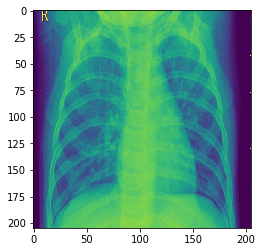

Predicted label :  [1]
True label :  [[1]]


In [40]:
imageIndex = 9
plt.imshow(np.squeeze(features[imageIndex:imageIndex+1]))
plt.show()
pred = model.predict(features[imageIndex:imageIndex+1])
predicted_label =pred.argmax(axis=-1)
print("Predicted label : ", predicted_label)
print("True label : ", targets[imageIndex:imageIndex+1])

# ---------------------------------Start LIME---------------------------------------

(205, 205)


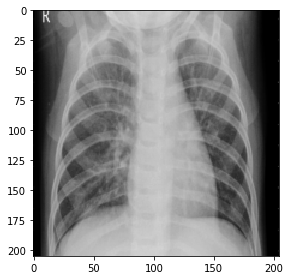

In [41]:
# Read Image
imageUrl = "../pneumonia/data/test/all/person53_virus_108.jpg"
import numpy as np
import skimage
Xi = skimage.io.imread(imageUrl)
Xi = skimage.transform.resize(Xi, (image_size,image_size))
Xi = (Xi - 0.5)*2 #Inception pre-processing
skimage.io.imshow(Xi/2+0.5)
print(Xi.shape)

In [42]:
# Predict
curImg = (Image.open(imageUrl).resize((image_size, image_size)))
curImg = np.array(np.expand_dims(curImg, axis=-1))
print(curImg.shape)
pred = model.predict(curImg[np.newaxis,:,:])
print("Predicted label : ", pred)

(205, 205, 1)
Predicted label :  [[-2.6931999  2.1777728]]


# Generate random perturbations for input image

[1 0 1 0 1 0 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0]


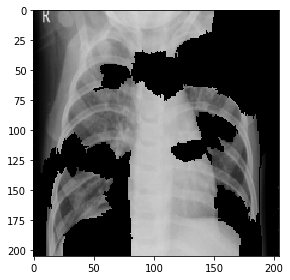

In [48]:
#Generate segmentation for image
import skimage.segmentation
superpixels = skimage.segmentation.quickshift(Xi, kernel_size=4, convert2lab=False, max_dist=200, ratio=0.2)
num_superpixels = np.unique(superpixels).shape[0]
skimage.io.imshow(skimage.segmentation.mark_boundaries(Xi/2+0.5, superpixels))


#Generate perturbations
num_perturb = 50
perturbations = np.random.binomial(1, 0.5, size=(num_perturb, num_superpixels))

#Create function to apply perturbations to images
import copy
def perturb_image(img,perturbation,segments): 
    active_pixels = np.where(perturbation == 1)[0]
    mask = np.zeros(segments.shape)
    for active in active_pixels:
        mask[segments == active] = 1 
    perturbed_image = copy.deepcopy(img)
    perturbed_image = perturbed_image*mask[:,:,]
    return perturbed_image

#Show example of perturbations
print(perturbations[0]) 
skimage.io.imshow(perturb_image(Xi/2+0.5,perturbations[2],superpixels))

# Predict class for perturbations

In [49]:
predictions = []
for pert in perturbations:
    perturbed_img = perturb_image(Xi,pert,superpixels)
    perturbed_img = np.array(np.expand_dims(perturbed_img, axis=-1))
    pred = model.predict(perturbed_img[np.newaxis,:,:])
    predictions.append(pred)

predictions = np.array(predictions)
print(predictions.shape)
print(predictions[0])

(50, 1, 2)
[[-0.33400694 -0.16172653]]


# Compute weights (importance) for the perturbations

In [50]:
#Compute distances to original image
import sklearn.metrics
original_image = np.ones(num_superpixels)[np.newaxis,:] #Perturbation with all superpixels enabled 
distances = sklearn.metrics.pairwise_distances(perturbations,original_image, metric='cosine').ravel()
print(distances.shape)

#Transform distances to a value between 0 an 1 (weights) using a kernel function
kernel_width = 0.25
weights = np.sqrt(np.exp(-(distances**2)/kernel_width**2)) #Kernel function
print(weights.shape)

(50,)
(50,)


# Fit a explainable linear model using the perturbations, predictions and weights

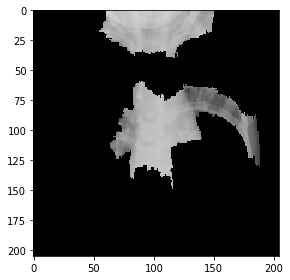

In [51]:
#Estimate linear model
from sklearn.linear_model import LinearRegression
class_to_explain = 1
simpler_model = LinearRegression()
simpler_model.fit(X=perturbations, y=predictions[:,:,class_to_explain], sample_weight=weights)
coeff = simpler_model.coef_[0]

#Use coefficients from linear model to extract top features
num_top_features = 4
top_features = np.argsort(coeff)[-num_top_features:] 

#Show only the superpixels corresponding to the top features
mask = np.zeros(num_superpixels) 
mask[top_features]= True #Activate top superpixels
skimage.io.imshow(perturb_image(Xi/2+0.5,mask,superpixels))